<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Outliers

In [2]:
#dummy data maker
def dummy_data(size=100, mu=50, sigma=15, seed=42):
  np.random.seed(seed)

  ##loc=mu (center of normal curve)
  ##scale=sigma (std)
  samples = np.random.normal(loc=mu, scale=sigma, size=size)
  samples = np.round(samples, decimals=0)

  return samples

In [4]:
dummy

array([57., 48., 60., 73., 46., 46., 74., 62., 43., 58., 43., 43., 54.,
       21., 24., 42., 35., 55., 36., 29., 72., 47., 51., 29., 42., 52.,
       33., 56., 41., 46., 41., 78., 50., 34., 62., 32., 53., 21., 30.,
       53., 61., 53., 48., 45., 28., 39., 43., 66., 55., 24., 55., 44.,
       40., 59., 65., 64., 37., 45., 55., 65., 43., 47., 33., 32., 62.,
       70., 49., 65., 55., 40., 55., 73., 49., 73., 11., 62., 51., 46.,
       51., 20., 47., 55., 72., 42., 38., 42., 64., 55., 42., 58., 51.,
       65., 39., 45., 44., 28., 54., 54., 50., 46.])

<ipython-input-8-191e4a29a4d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dummy)


<Axes: ylabel='Density'>

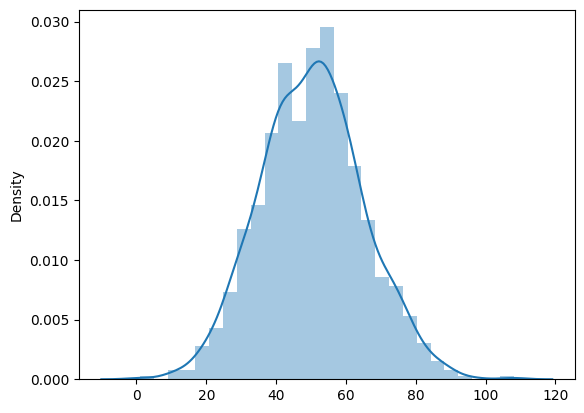

In [8]:
dummy = dummy_data(1000)

sns.distplot(dummy)

<Axes: >

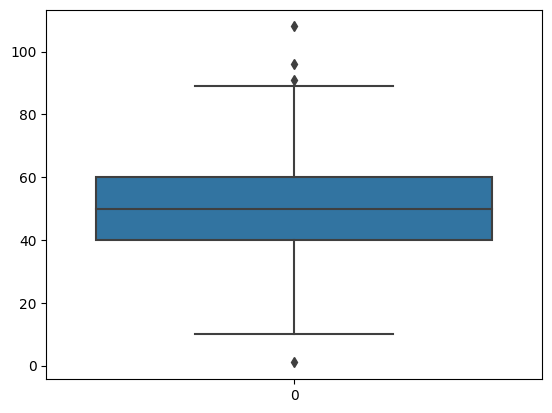

In [9]:
sns.boxplot(dummy)

In [15]:
data = pd.Series(dummy)
desc = data.describe()
desc

count    1000.000000
mean       50.275000
std        14.693375
min         1.000000
25%        40.000000
50%        50.000000
75%        60.000000
max       108.000000
dtype: float64

In [16]:
IQR = desc['75%'] - desc['25%']

In [18]:
lower_limit = desc['25%'] - (1.5 * IQR)
upper_limit = desc['75%'] + (1.5 * IQR)

In [22]:
data[lower_limit < data]

0      57.0
1      48.0
2      60.0
3      73.0
4      46.0
       ... 
995    46.0
996    77.0
997    60.0
998    41.0
999    59.0
Length: 997, dtype: float64

In [23]:
np.percentile(data, [75, 25])

array([60., 40.])

##Remove outliers from real data

In [46]:
df = pd.read_csv("Ames_Housing_Data.csv")

df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


###[correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

[Pearson_correlation_coefficient WIKI](
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [4]:
df.corr()["SalePrice"].sort_values()

<ipython-input-4-7718c9f5b708>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["SalePrice"].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

###Plot top correlating column with SalePrice

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

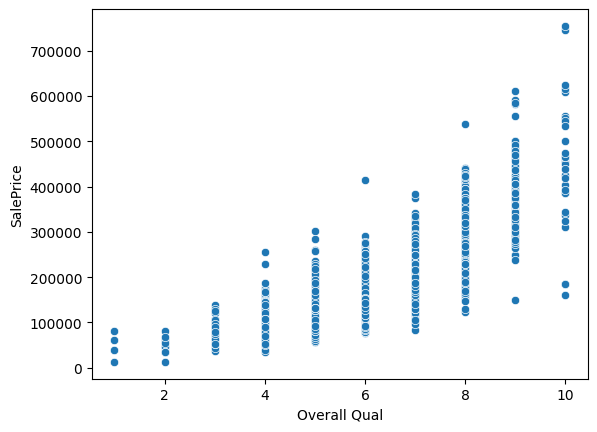

In [6]:
sns.scatterplot(data=df,y="SalePrice",  x="Overall Qual")
##Notice this is a categorical feature

###Plot top correlating column with 2nd SalePrice

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

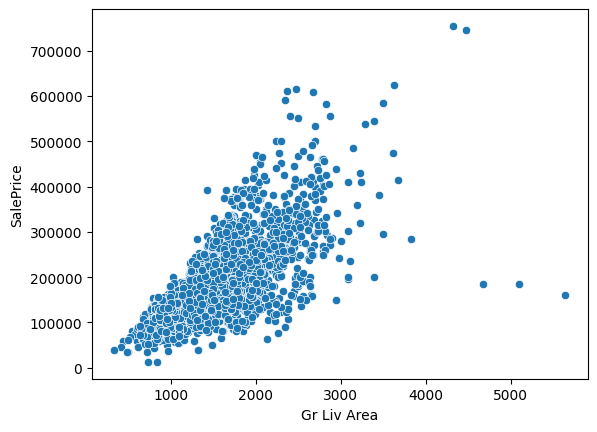

In [47]:
sns.scatterplot(data=df,y="SalePrice",  x="Gr Liv Area")

###Find outliers

In [48]:
outliers = df[(df["SalePrice"]<200000)&(df["Overall Qual"]>8)]

###Drop outliers rows

In [49]:
df = df.drop(outliers.index, axis=0)

##Evaluation of Missing Data

###remove "PID" column

In [50]:
df = df.drop(["PID"], axis=1)

###sum null values per column and sort, convert to percentage and filter <= 0

In [51]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

In [14]:
nan_percent

Total Bsmt SF      0.034176
Electrical         0.034176
Bsmt Unf SF        0.034176
Garage Area        0.034176
BsmtFin SF 1       0.034176
BsmtFin SF 2       0.034176
Garage Cars        0.034176
Bsmt Half Bath     0.068353
Bsmt Full Bath     0.068353
Mas Vnr Area       0.786056
Mas Vnr Type       0.786056
BsmtFin Type 1     2.734108
Bsmt Cond          2.734108
Bsmt Qual          2.734108
BsmtFin Type 2     2.768284
Bsmt Exposure      2.836637
Garage Type        5.365687
Garage Finish      5.434040
Garage Yr Blt      5.434040
Garage Qual        5.434040
Garage Cond        5.434040
Lot Frontage      16.712235
Fireplace Qu      48.598770
Fence             80.451128
Alley             93.233083
Misc Feature      96.411483
Pool QC           99.589884
dtype: float64

In [16]:
100 / len(df)  ##Calc 1 row %

0.03417634996582365

###show a barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Total Bsmt SF'),
  Text(1, 0, 'Electrical'),
  Text(2, 0, 'Bsmt Unf SF'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Cond'),
  Text(13, 0, 'Bsmt Qual'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Qual'),
  Text(20, 0, 'Garage Cond'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

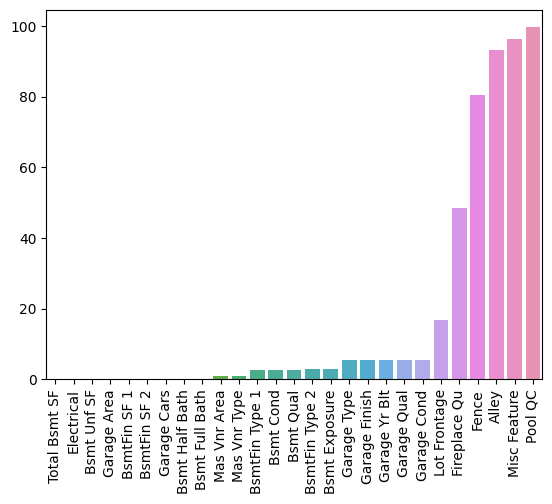

In [52]:
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

##Filling or Dropping data

In [20]:
df[df["Total Bsmt SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [22]:
df[df["Electrical"].isnull()] ##Notice this row has a couple of NaN columns
##should we remove it

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [53]:
df = df.dropna(axis=0, subset=["Electrical","Garage Cars"])

##Visualize Again after filtering

(0.0, 1.0)

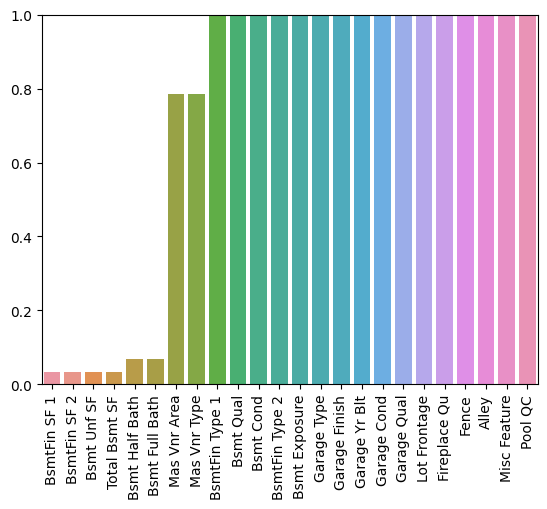

In [54]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

plt.ylim(0,1) ##NOTICE we are limiting y axis

###Replacing NaN Values

In [ ]:
##Checkout "Bsmt Full Bath" null values
df[df['Bsmt Full Bath'].isnull()]

In [ ]:
##Checkout "BsmtFin SF 1" null values
##Notice it's one of the rows from the last query
df[df['BsmtFin SF 1'].isnull()]

In [36]:
df.columns  ##view all the columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

##Filter columns list based on whether the column title contains "Bsmt"

In [55]:
filtered_columns = [col for col in df.columns if 'Bsmt' in col]
filtered_columns

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

##Check Column dtype

In [39]:
df['Bsmt Unf SF'].dtype

dtype('float64')

In [56]:
for i in filtered_columns:
  print(df[i].dtype)

object
object
object
object
float64
object
float64
float64
float64
float64
float64


##Split columns based on dtype

In [57]:
num_cols = []
str_cols = []

for i in filtered_columns:
  if (df[i].dtype == "object"):
    str_cols.append(i)
  elif (df[i].dtype == "float64"):
    num_cols.append(i)


In [43]:
str_cols

['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

###Fill NaN float64 columns with 0

In [58]:
df[num_cols] = df[num_cols].fillna(0)

###Fill NaN "object" str columns with "None"

In [59]:
df[str_cols] = df[str_cols].fillna("None")

###Visualize Again After Data fill

(0.0, 1.0)

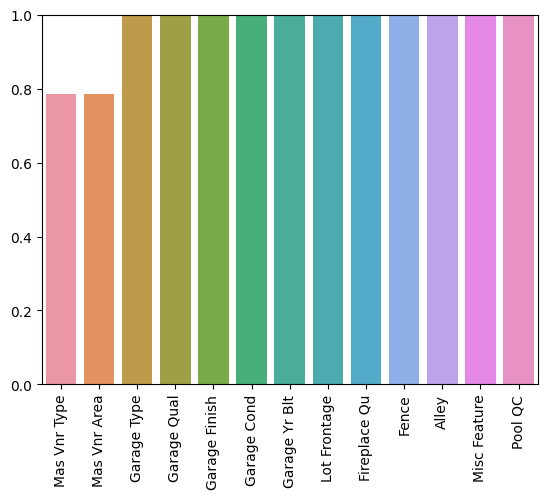

In [60]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

plt.ylim(0,1) ##NOTICE we are limiting y axis

###Fix other <1% nan columns

In [61]:
df['Mas Vnr Type'].dtype

dtype('O')

In [63]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")

In [62]:
df['Mas Vnr Area'].dtype

dtype('float64')

In [64]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

###Visualize

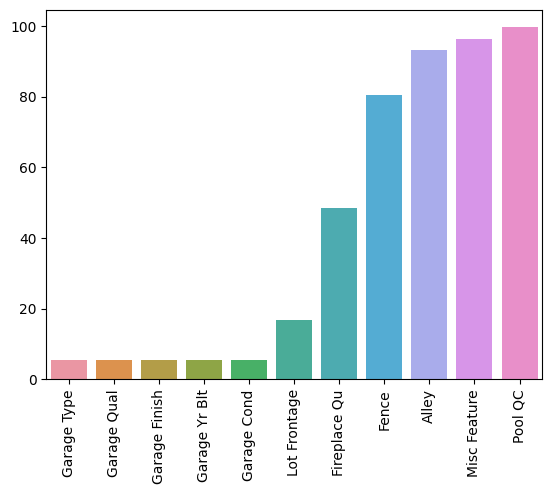

In [67]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);


###Fix rows with >1% Nan values

In [73]:
##select columns with nan_percent > 1%  & nan_percent < 5%
filtered_column_names = [x for x in nan_percent.index if nan_percent[x] < 15]

###Split columns based on dtype

In [74]:
num_cols = []
str_cols = []

for i in filtered_column_names:
  if (df[i].dtype == "object"):
    str_cols.append(i)
  elif (df[i].dtype == "float64"):
    num_cols.append(i)

In [77]:
print(num_cols)
print(str_cols)

['Garage Yr Blt']
['Garage Type', 'Garage Qual', 'Garage Finish', 'Garage Cond']


##Fix missing data

In [78]:
df[num_cols] = df[num_cols].fillna(0)

In [79]:
df[str_cols] = df[str_cols].fillna("None")

###Visualize

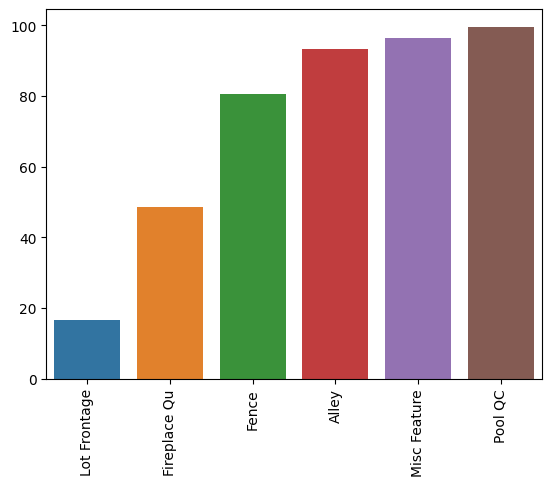

In [80]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

##Remove full Columns with nan_percent > 90%

In [83]:
filtered_column_names = [x for x in nan_percent.index if nan_percent[x] >= 80]
filtered_column_names

In [85]:
df = df.drop(filtered_column_names, axis=1)

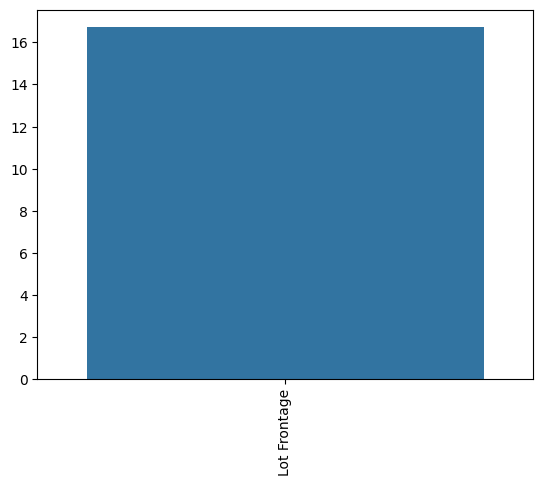

In [91]:
nan_percent = 100 * df.isnull().sum().sort_values() / len(df)
nan_percent = nan_percent[nan_percent>0]

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

In [88]:
df["Fireplace Qu"].value_counts()

Gd    740
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [90]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

##Filling Nan Values with statistics

In [92]:
df["Lot Frontage"]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2924, dtype: float64

###Based on Domain knowledge, we can make an assumption - Let's test Corrolation first

In [96]:
df.corr()["Lot Frontage"].sort_values() ##Notice no corrolation is > 0.5

<ipython-input-96-f0297eca0318>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Lot Frontage"].sort_values() ##Notice no corrolation is > 0.5


MS SubClass       -0.430521
Overall Cond      -0.072866
Bsmt Half Bath    -0.028655
Yr Sold           -0.007396
Low Qual Fin SF    0.006049
Kitchen AbvGr      0.006890
Misc Val           0.014022
Mo Sold            0.016471
Enclosed Porch     0.016562
2nd Flr SF         0.021647
3Ssn Porch         0.029928
Half Bath          0.034289
BsmtFin SF 2       0.048845
Screen Porch       0.080470
Year Remod/Add     0.087098
Bsmt Full Bath     0.094725
Garage Yr Blt      0.103244
Wood Deck SF       0.114204
Year Built         0.116581
Bsmt Unf SF        0.118046
Pool Area          0.125000
Open Porch SF      0.141202
BsmtFin SF 1       0.165814
Full Bath          0.182655
Overall Qual       0.200698
Mas Vnr Area       0.201185
Fireplaces         0.244824
Bedroom AbvGr      0.246874
Garage Cars        0.312195
Total Bsmt SF      0.312418
TotRms AbvGrd      0.341440
Garage Area        0.345994
Gr Liv Area        0.355336
SalePrice          0.367518
1st Flr SF         0.432625
Lot Area           0

In [95]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

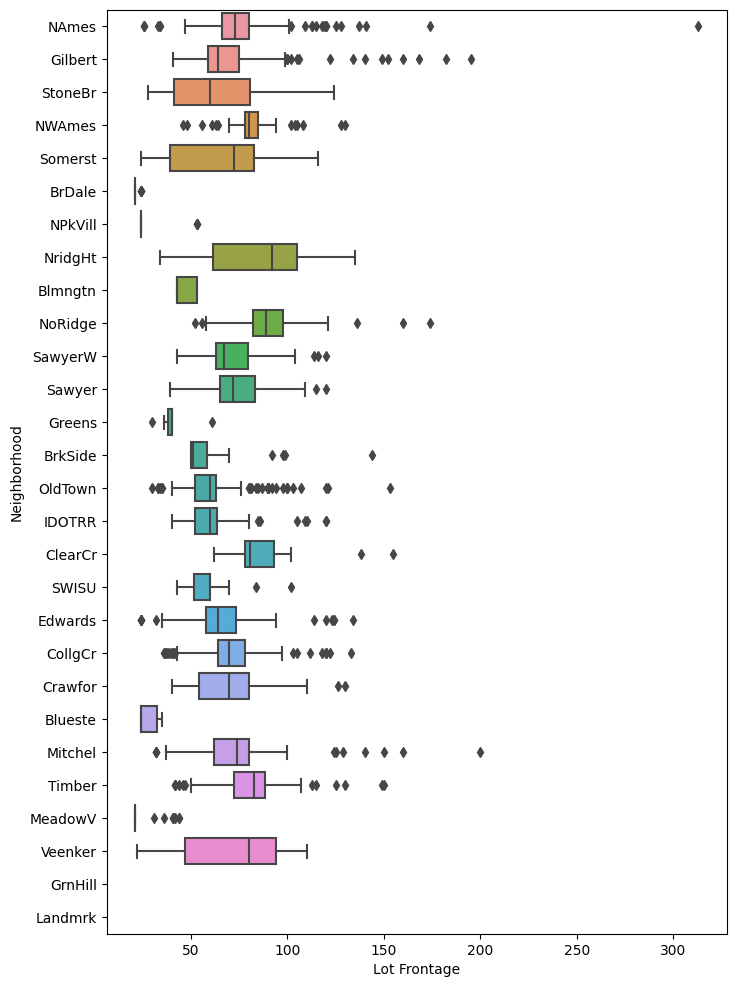

In [99]:
##lets use 'Neighborhood' to group our data
plt.figure(figsize=(8, 12))
sns.boxplot(data=df, x="Lot Frontage", y='Neighborhood')
##Notice we have a lot of outliers, but we will use this for simplicity

In [100]:
df.groupby('Neighborhood')["Lot Frontage"]

In [101]:
df.groupby('Neighborhood')["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

##Replace NaN values with the mean based on grouping by the 'Neighborhood'

###Pandas transform()

In [102]:
df["Lot Frontage"] = df.groupby('Neighborhood')["Lot Frontage"].transform(lambda value: value.fillna(value.mean()))

In [108]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

###Fill last missing values with 0

In [107]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)